## Carga de librerías

In [2]:
# importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings

## Carga del archivo CSV

In [4]:
# Cargar el archivo CSV
df = pd.read_csv("files/tratamiento_de_valores_faltantes.csv")
df.head()

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199


## Exploración de los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      482 non-null    float64
 1   x2      480 non-null    object 
 2   x3      486 non-null    float64
 3   x4      483 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


In [6]:
# Identificar las variables categóricas y numéricas
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
cat_vars = df.select_dtypes(include=['object']).columns
num_vars = df._get_numeric_data().columns

In [7]:
# Imprimir las variables categóricas y numéricas
print("Variables categóricas: ", cat_vars)
print("Variables numéricas: ", num_vars)

Variables categóricas:  Index(['x2'], dtype='object')
Variables numéricas:  Index(['x1', 'x3', 'x4'], dtype='object')


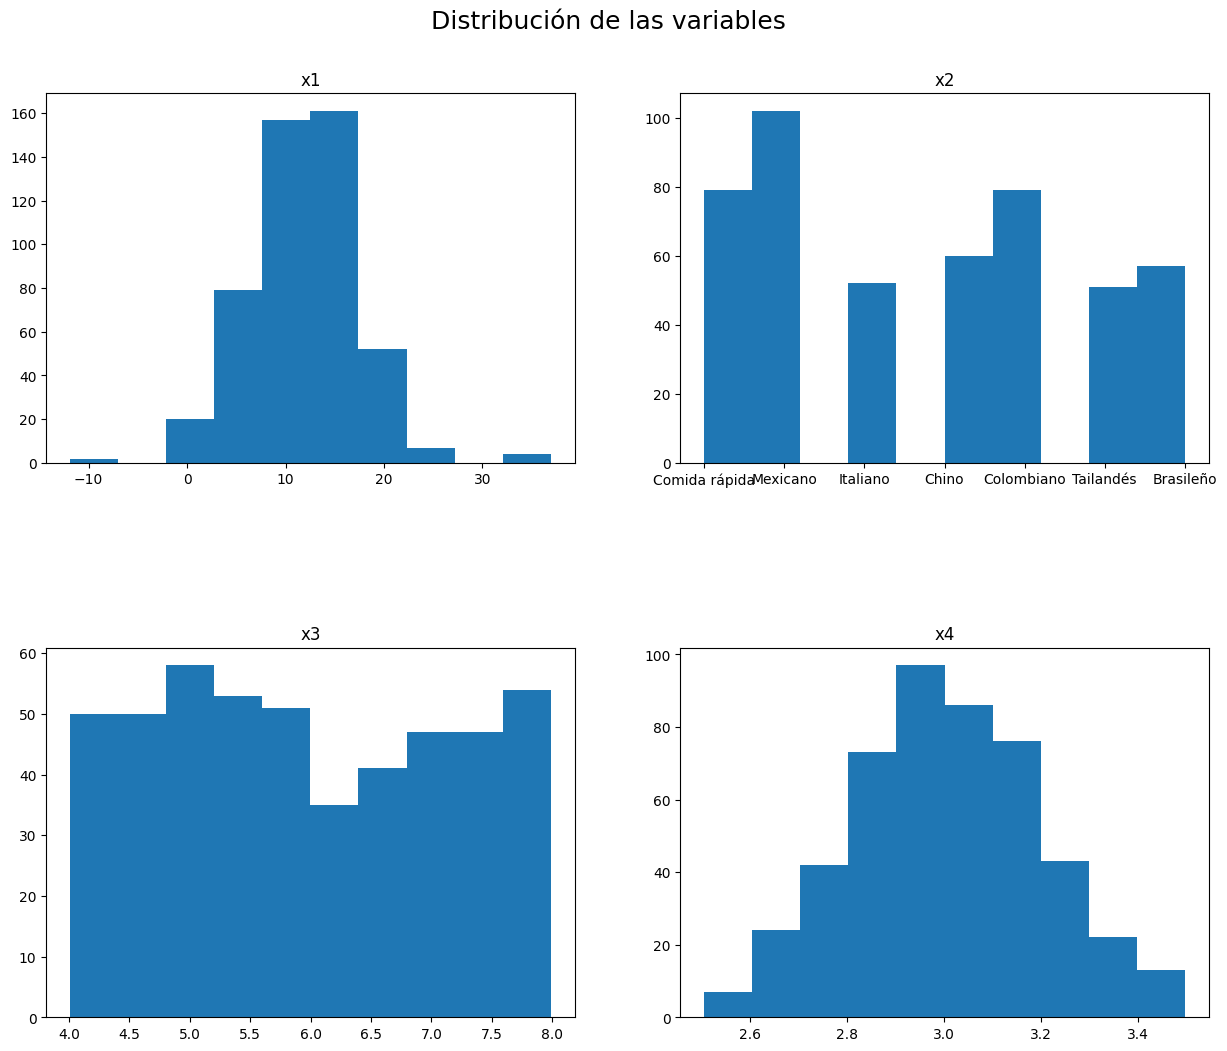

In [10]:
# Imprimir la distribución de las variables
# Se define el grid de la subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribución de las variables", fontsize=18, y=0.95)

for col_name, ax in zip(df.columns, axs.ravel()):
    ax.hist(df[col_name].dropna(), bins=10)
    ax.set_title(col_name)
plt.show()

In [11]:
# - Si la variable presenta distribución uniforme, sustituya de forma aleatoria (considere como distribución uniforme curtosis menor a -1.2).
# De esto se infiere que la columna x3 tiene una distribución uniforme
df.kurt() < -1.2

C:\Users\anhernan\AppData\Local\Temp\ipykernel_14876\67291007.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt() < -1.2


x1    False
x3     True
x4    False
dtype: bool

In [12]:
# Revisemos las variables con sesgo positivo, si el valor es mayor a 1 es sesgo positivo.
df.skew(numeric_only=True)

x1    0.246582
x3    0.095405
x4    0.105376
dtype: float64

In [13]:
# Podemos evaluar moda individualmente para efectos ilustrativos
# Como es posible observar, las columnas numéricas parecen no tener valores repetitivos
df_mode = df.mode(axis=0, numeric_only=False, dropna=True)
df_mode
# Se infiere que la unica variable categórica es x2 y la moda es 'Mexicano'

,x1,x2,x3,x4
0,-11.866135,Mexicano,4.010899,2.506359
1,-11.328720,NaN,4.014312,2.527400
2,-1.936713,NaN,4.015999,2.547136
3,-0.949094,NaN,4.018869,2.547737
4,-0.776972,NaN,4.026486,2.565325
...,...,...,...,...
481,36.922954,NaN,7.953492,3.482389
482,NaN,NaN,7.961679,3.496185
483,NaN,NaN,7.967528,NaN
484,NaN,NaN,7.973909,NaN


In [14]:
df_mean = df.mean()
df_mean

C:\Users\anhernan\AppData\Local\Temp\ipykernel_14876\4125945695.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean = df.mean()


x1    11.946714
x3     5.955536
x4     3.003786
dtype: float64

In [15]:
# Podemos evaluar mediana individualmente para efectos ilustrativos
df.median(axis=0, numeric_only=True)

x1    11.997242
x3     5.887484
x4     3.000913
dtype: float64

## Manejo de valores faltantes

In [16]:
# Revisar valores faltantes
dfNaN=df.isna()
dfNaN.sum()

x1    18
x2    20
x3    14
x4    17
dtype: int64

Como ya se argumentó, se sustituirán los valores faltantes por el valor más común o moda en el caso de las variables categóricas y por la mediana en el caso de las variables numéricas.

# Identificación de valores atípicos

<AxesSubplot: >

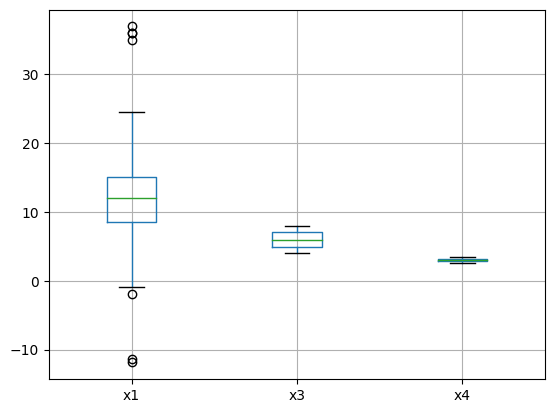

In [17]:
# Como ejemplo más tangible, podemos visualizar un boxplot
df.boxplot()

## Summary
Del df inferimos 

![Cómo enfrentar valores atípicos](files\map_missing_fields.png "Cómo enfrentar valores atípicos")

x1 - Sesgo positivo. Normal. Valores atípicos. Se utilizará la mediana.

x2 - Categórica. Se utilizará Moda.

x3 - Dist Uniforme. Se utilizará Aleatoria. 

x4 - Sesgo positivo. Normal. Sin valores atípicos. Media aritmética.


Se decide eliminar los valores atípicos porque es probable que si se realiza un estudio con estos datos, los valores atipicos sesgen los resultados al no ser tan comunes.


En este punto, el dataset ya no contiene observaciones con valores átipicos o datos nulos. Se alcanzan a ver calores cercanos a los bigotes, pero ya están muy cercanos y no representan un problema.

<AxesSubplot: >

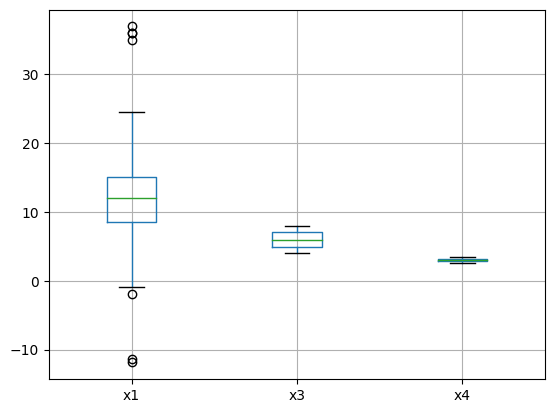

In [18]:
# Revisar si existen outliers
df.boxplot()

## Sustitución de valores faltantes

In [19]:
df_clean = df.copy()
# x1 - Sesgo positivo. Normal. Valores atípicos. Se utilizará la mediana.
df_clean.x1.fillna(df.x1.median(), inplace=True)
df_clean.x1.isna().sum() 
# x2 - Categórica. Se utilizará Moda.
df_clean.x2.fillna(df.x2.mode()[0], inplace=True)
df_clean.x2.isna().sum() 
# x3 - Dist Uniforme. Se utilizará Aleatoria. 
warnings.filterwarnings("ignore")
df_no_nan = df.copy()
df_no_nan.dropna(inplace=True)
df_no_nan.reset_index(drop=True, inplace=True)
random_index = np.random.randint(df_no_nan.shape[0],size=df.x3.isna().sum())
df_clean.x3.loc[np.where(df.x3.isna())] = df_no_nan.x3.loc[random_index].values
df_clean.x3.isna().sum()
# x4 - Sesgo positivo. Normal. Sin valores atípicos. Media aritmética.
df_clean.x4.fillna(df.x4.mean(), inplace=True)
df_clean.x4.isna().sum()

0

In [20]:
df_clean.head()

,x1,x2,x3,x4
0,1.307150,Comida rápida,5.249548,2.790293
1,18.422083,Mexicano,5.278007,3.330853
2,7.729605,Italiano,7.403145,2.895753
3,10.599776,Comida rápida,7.209577,3.393178
4,5.612505,Chino,5.896599,2.901199


In [21]:
# Revisar valores faltantes
dfNaN=df_clean.isna()
dfNaN.sum()

x1    0
x2    0
x3    0
x4    0
dtype: int64

array([[<AxesSubplot: title={'center': 'x1'}>,
        <AxesSubplot: title={'center': 'x3'}>],
       [<AxesSubplot: title={'center': 'x4'}>, <AxesSubplot: >]],
      dtype=object)

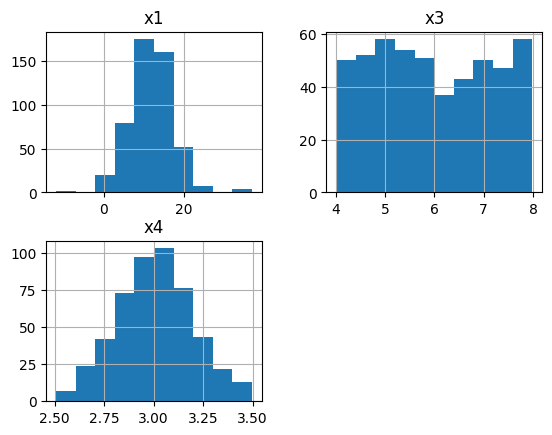

In [22]:
df_clean.hist()

# Retomando los outliers

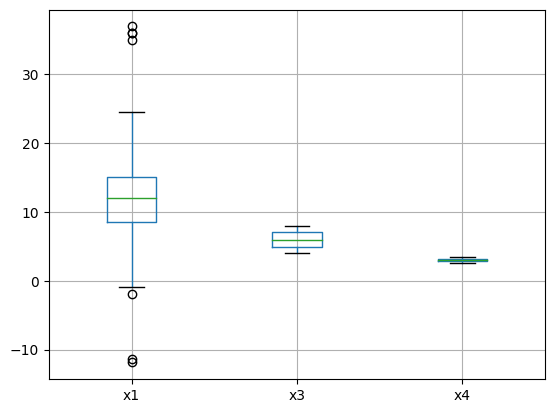

In [28]:
# PANDAS BOXPLOT documentación: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

# Primero obtenemos el boxplot utilizando el return_type both, para poder extraer datos 
axes, boxplot_dict = pd.DataFrame.boxplot(df, return_type='both')

In [29]:
# Mirando la documentación de BOXPLOT (vid supra) se sabe que al utilizar un return_type 'BOTH' se obtiene un 'dictionary whose values are the matplotlib Lines of the boxplot.'
# Echemos un vistazo:
boxplot_dict

{'whiskers': [<matplotlib.lines.Line2D at 0x20954e212a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20954e20f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20954e20a00>,
 'medians': [<matplotlib.lines.Line2D at 0x20954e23b80>,
 'fliers': [<matplotlib.lines.Line2D at 0x20954e239d0>,
 'means': []}

In [45]:
# Para obtener las outliers, utilizaremos la key 'fliers' y como cada key tiene dentro objetos del tipo 'matplotlib.lines.Line2D', utilizamos la función get_ydata para 
outliers = [flier.get_ydata() for flier in boxplot_dict["fliers"]]
boxes = [box.get_ydata() for box in boxplot_dict["boxes"]]
medians = [median.get_ydata() for median in boxplot_dict["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in boxplot_dict["whiskers"]]

# Esta es la posición de los outliers, en este caso tenemos 3 arrays. Index 0 es x1, index 1 es x3 e index 2 es x4. Mostremos x1: 
index_x1 = 0
outliers_x1 = outliers[index_x1]
outliers_x1

array([-11.86613523835208, -1.9367126619459365, -11.328719733668343,
       36.03683278064378, 36.922954239989565, 35.02596490973356,
       35.90920133270292], dtype=object)

<AxesSubplot: >

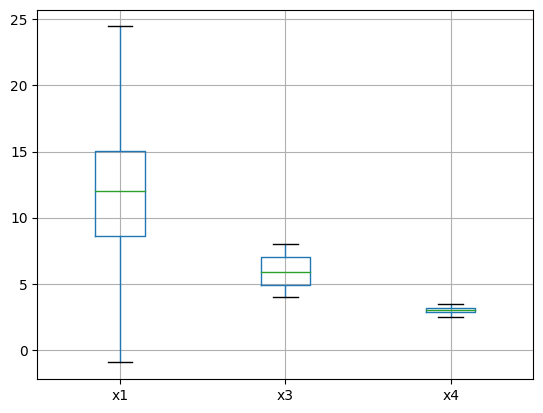

In [46]:
# Luego usaremos dataframe.isin 
# Documentación: https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
# https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

df_without_outliers = df[~df.x1.isin(outliers_x1)]
df_without_outliers.boxplot()

## Fuentes
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
